In [1]:
import pandas as pd
from pandas import Series,DataFrame

In [2]:
titanic_df = pd.read_csv('train.csv')

In [3]:
# this displays the first five rows of the data

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# this gives us info about the data and the data types present


# we can see that there are 891 non-null entries for most columns, 
# but the 'cabin' column only contains 204 entries with the rest being null


titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# First we want to learn about the passengers aboard the titanic. What are their ages, gender, class, etc.
# this can give us a good mental picture of the passengers, and will allow us to further questions to investigate.
# this is a simple step which is useful for 'warming up' before delving into deeper investigation of the data.
# this can help get the brain going and thinking of what to investigate.

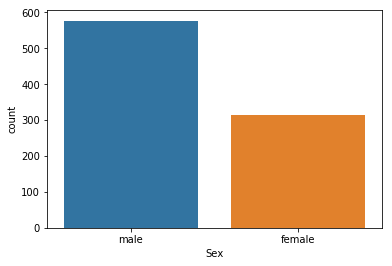

In [7]:
# this will display a simple plot showing the number of males and females aboard the ship.
# we can do this with any column to get a quick idea and visual of data.

sns.countplot('Sex',data=titanic_df)

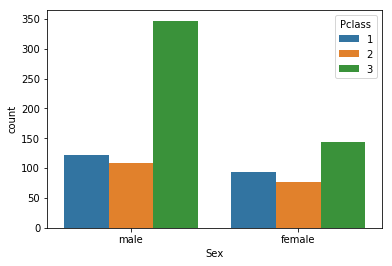

In [8]:
# this further breaks down the number of males and females into Pclass.
# hue can be changed to any of the other columns to see different breakdowns.
# notice that there were far more males in Pclass 3 than in the other classes,
# and most of the males were in Pclass 3. and there were far more males in 
# Pclass 3 than femals in Pclass 3.

sns.countplot('Sex',data=titanic_df, hue='Pclass')

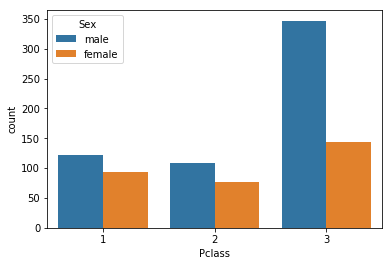

In [9]:
# this helps better visualize the difference in Pclass between males and females.

sns.countplot('Pclass', data=titanic_df, hue='Sex')

In [10]:
# the above graph is broken down into males and females, but how many of those are children?
# Maybe there wlll be more children in class 1 or 2 due to the saying "ladies and children first"
# below, anyone below the age of 16 is considered a child
# the function will take in a passenger, and output if that passenger was a child (if under 16),
# or if that passenger was a male or female

def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [11]:
# a new column called 'person' is being created, and the column will be populated with the result
# of the 'male_female_child' function
# the function will take in 'Age' and 'Sex' as a parameters
# remember to change 'axis' to 1 since columns names are used
# this function created a new column

titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [12]:
# a quick view of the first 10 lines of the updated dataframe shows children

titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


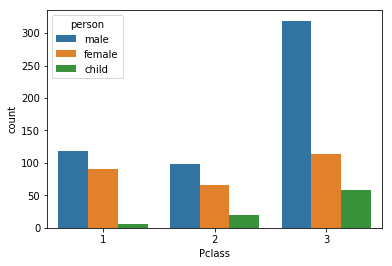

In [13]:
# this plot will show that there were more children in class 3 than the other classes.
# my initial guess was incorrect

sns.countplot('Pclass',data=titanic_df,hue='person')

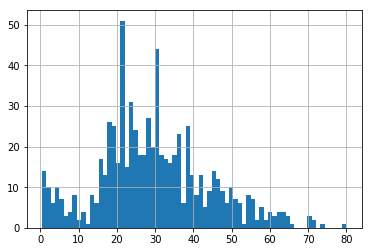

In [14]:
# this will show a distribution of the ages 
# most of the passengers were between 15 and 35
# the mean age looks to be around 30
# not many passengers from ages 5 to 15, although there are plenty below 5 and above 15

titanic_df['Age'].hist(bins=70)

In [15]:
# the mean age is indeed about 30

titanic_df['Age'].mean()

29.69911764705882

In [16]:
# a breakdown of the total number of passengers in each 'person' category

titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

C:\Users\munaw\Anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


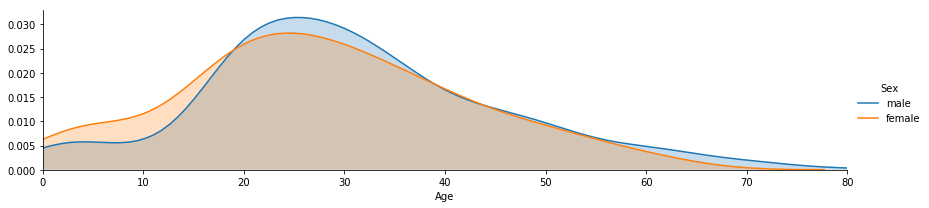

In [17]:
# a FacetGrid is used to create multiple plots on one figure. Here, multiple plots of 'Sex'
# will be plotted on the same figure. In particular, kde plots of the Age will be shown, broken
# down by 'Sex' which is the hue. kde plots visualize the distribution of data over an interval,
# are variations of histograms. However, they are better at determining distirbution shape, and do not rely on
# bin size to create smooth distributions. Aspect changes the size of the plot, and shade will shade in beneath
# each of the lines.

fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

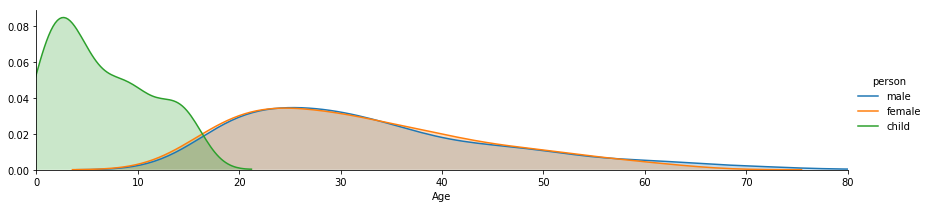

In [18]:
# below is the same figuire as above, except 'person' is the hue. This allows us to see the
# distribution of ages of the children as well. Note, the kde plot for the children extends beyond
# age 16, but this is due to the bandwith of the kde plot.

fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

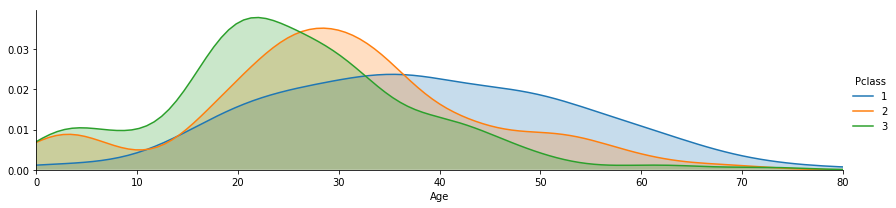

In [19]:
# we will create another figure like those above, except with Pclass as the hue. this will show
# the distribution of ages based on class. I expect to see younger people in classes 1 and 2, and
# ages 30 and above in class 1. My predition was mostly correct. Class 1 was mostly those 30 and older,
# while classes 2 and 3 contained those below 30, and some above. perhaps we can investigate the income
# levels of those i nthe various classes, or we can investigate how many people from each classes surivived,
# and then we can infer that those who were wealthier had a greater chance of survival.

fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [20]:
# we now have a good idea of the passengers on the ship. We know the average age is 30, and that most below 30
# were in classes 2 and 3, and those above 30 were in class 1. the distribution of females across the classes
# was fairly even, but there were far more males in class 3 than in other classes. There were twice as many
# males as females.

# the next question we want to know is  what deck were the passengers on and how does that relate to their class?
# does class 1 mean a certain deck? if certain decks have a higher survival rate (they could be the highest decks
# or they could have easy access to life vests, boats, etc), then we know that this may be a bigger factor than
# class, age, etc.


# 3. where did the passengers come from
# 4. who was alone and who was with family

In [21]:
# lets get a preview of the data again. we can see that there some entries for cabin have null values.
# lets drop these nulls values as they dont tell us anything. also we only really need the first letter
# of the cabin entry to tell us the deck, the other numbers are room numbers.

titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [22]:
# lets take the cabin column specifically, and drop all null values from it and then generate a preview
# to make sure it worked.

deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [23]:
# the following while look will output only the letter in each cabin entry. first creating an empty list,
# for all entries (level) in deck, the first letter of the entry will be added to the list 'levels'

levels = []

for level in deck:
    levels.append(level[0])

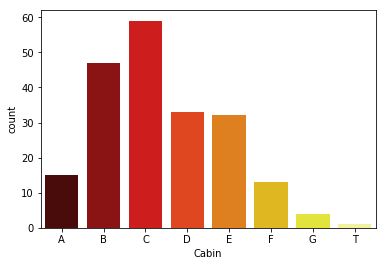

In [24]:
# now we will create a count plot of the levels to get an idea of how many people were in each level.
# first we will create a dataframe out of the levels list, then we will rename it to cabin, then we will
# create the count plot.

# this create the dataframe from an existing list
cabin_df = DataFrame(levels)

#now we will name the column of the new dataframe
cabin_df.columns=['Cabin']

# the palette is not a required entry, but here it is chosed to be a specific type.
# palettes can be found here: https://matplotlib.org/users/colormaps.html
# you can also choose a palette name and add '_d' to the end to make it darker. for example, 'hot_d'
# the cabin values wont be in abc order unless you state the .values.sort() code
cabin_df['Cabin'].values.sort()
sns.countplot('Cabin',data=cabin_df,palette='hot')

# you can also sort the data in the following way. you can remove any of the letters in 'order' to display
# only the letters you want.
# sns.countplot('Cabin',data=cabin_df,order=['A','B','C','D','E','F','G','T'],palette='hot')

In [25]:
# the above count plot shows a data point called 'T'. lets see how many 'T' entries there are, as is could be
# an anomaly.
# there is one 'T' entry which is weird, so we can graph the above again but without 'T' using the above code
# or using the code in the next cell.

cabin_df['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

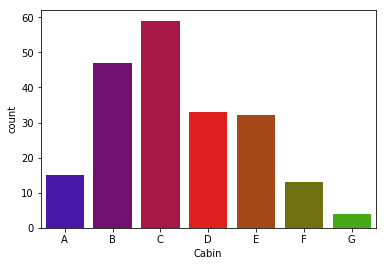

In [26]:
# this code will eliminate 'T' from the cabin_df dataframe all together, and then create
# a count plot.

cabin_df = cabin_df[cabin_df.Cabin != 'T']

cabin_df['Cabin'].values.sort()
sns.countplot('Cabin',data=cabin_df,palette='brg')

In [27]:
# i want to create a count plot of the cabin level and class. may have to create a new dataframe
# that is two columns, of cabin letter and Pclass. do it below but move on for now.

In [28]:
# now we want to know where the passengers came from. In the data below, C stands for Cherbourg,
# Q stands for Queenstown, and S stands for Southampton

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


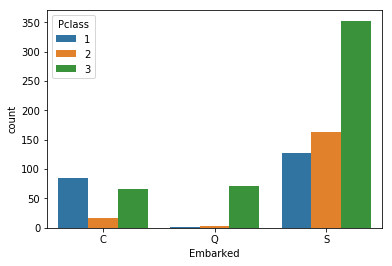

In [29]:
# lets make a count plot to get an idea of where people came from
# the data shows that most people came from Southampton.
# southampton consister mostly of people from class 3, and Queenstown was virtually all people who boarded on
# class 3. Almost all the people from class 1 boarded from C or S. Southampton seems to be a place whith a lot of
# diversity in income levels, ad Queesntown seems to be a place of less economic strength.

sns.countplot('Embarked', data=titanic_df, hue='Pclass', order=['C','Q','S'])

In [30]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [31]:
# this code will create a new column, adding two columns together. If this new column contains anything
# but 0, then it means the passenger was with someone. if 0, then the passenger was alone.

titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [32]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,1


In [33]:
# now we will change the numbers in the alone column to mean something. If any number is greater than 0,
# then it will signify they are with family

titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] ==0] = 'Alone'

C:\Users\munaw\Anaconda2\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [34]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,With Family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,With Family
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,With Family


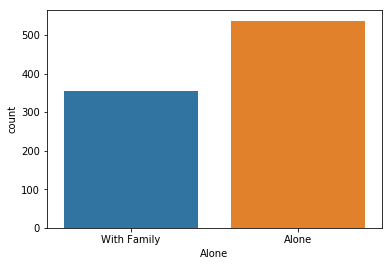

In [35]:
#we can see that most people were alone

sns.countplot('Alone',data=titanic_df)

In [36]:
# now we will create a new column to clarify if someone survived or now, using the
# .map() syntax, and by passing a dictionary to populate the new column

titanic_df['Survivor'] = titanic_df.Survived.map({1:'yes',0:'no'})

In [37]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone,no
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,no
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,With Family,no
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,With Family,yes
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,With Family,yes


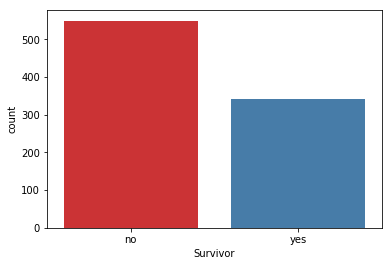

In [38]:
# a count plot to show how many survived and did not survive

sns.countplot('Survivor', data=titanic_df,palette='Set1')

C:\Users\munaw\Anaconda2\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


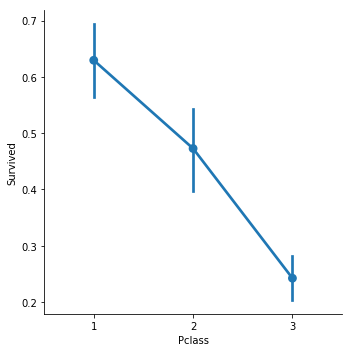

In [39]:
# this code creates a plot to show the relationship between class and survival. We can see that
# the lower the class, the lower the survival rate. this could be because there were just more people
# in third class than the other two, but also that there were many more men in third class than the
# other two.

sns.factorplot('Pclass','Survived',data=titanic_df)

C:\Users\munaw\Anaconda2\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


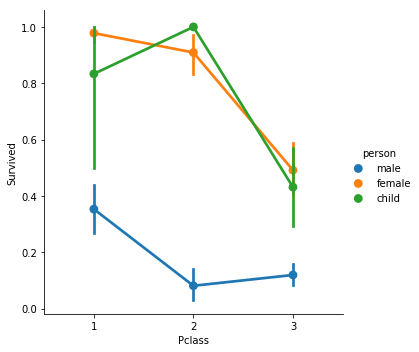

In [40]:
# now lets consider class and gender and survival. did more women and children survive than men?
# was there a difference in survival rates between the women in class 1 and class 3?

sns.factorplot('Pclass','Survived',data=titanic_df,hue='person')

# the data shows that being a male is not favorable for survival, and although males in first class
# had a higher survival rate than in the other two, males in general survived less than women or children.
# Women in class 1 did have a higher survival rate than women in class 2 and 3. this could just be due
# to the sheer number of people in class 3, making it difficult for all othem to abandon ship.

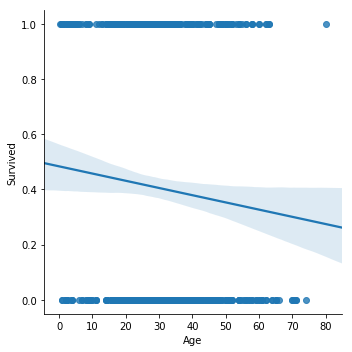

In [41]:
# now lets investigate is age is a factor in survival

sns.lmplot('Age','Survived',data=titanic_df)

# we can see that the older you are, the les likley you are to survive

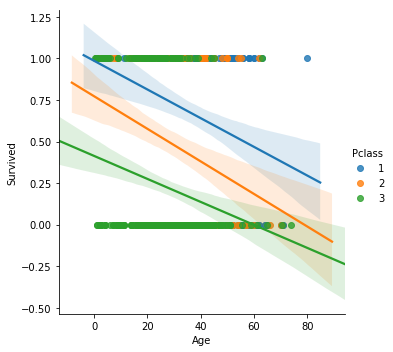

In [42]:
# further plotting the class as a hue shows us that regardless of class, elders were less likely to survive

sns.lmplot('Age','Survived',data=titanic_df,hue='Pclass')

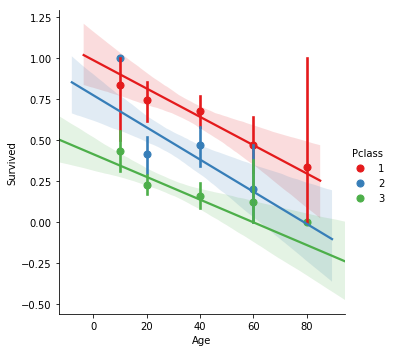

In [43]:
# this code will make the above graph clearer but setting all data points in bins which are indicated below

generations = [10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='Set1',x_bins=generations)

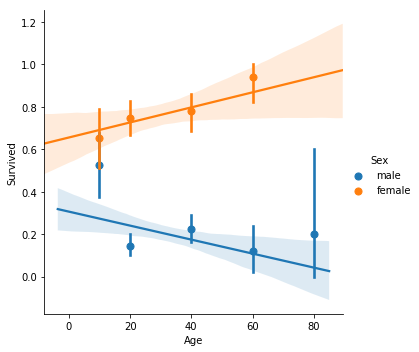

In [44]:
# how are gender and age related to survival?

sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,x_bins=generations)

# we can see that females in general had a better chance of survival than males, but that
# survival rate in women increased with age, whereas the opposite is true in men. However,
# the older male survival rate does have quite a bit of standard deviation.